In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/home/trevor/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
with open('14.in') as f:
    lines = f.read().strip().split('\n')

In [3]:
def calculate_location(line, secs, width, height):
    pattern = r'-?\d+'
    vals = [int(x) for x in re.findall(pattern, line)]
    px, py, vx, vy = vals
    px = (px+(secs*vx)) % width
    py = (py+(secs*vy)) % height
    return px, py

In [4]:
# find the solution for part 1
# problem assumptions
secs = 100
width = 101
height = 103
# quadrant counters
q1, q2, q3, q4 = 0, 0, 0, 0
for line in lines:
    px, py = calculate_location(line, secs, width, height)

    # check what quadrant robot is in
    if px < (width-1) / 2 and py < (height-1) / 2:
        q1 += 1
    elif px > (width-1) / 2 and py < (height-1) / 2:
        q2 += 1
    elif px < (width-1) / 2 and py > (height-1) / 2:
        q3 += 1
    elif px > (width-1) / 2 and py > (height-1) / 2:
        q4 += 1
ans1 = q1 * q2 * q3 * q4


In [5]:
# scratch work for part 2
pattern = r'-?\d+'
width = 101
height = 103
df = pd.DataFrame({})
# go out decently far to see images
for secs in range(400):
    xs = []
    ys = []
    for line in lines:
        px, py = calculate_location(line, secs, width, height)
        xs.append(px)
        ys.append(py)
    # store all robot locations in a dataframe
    df[f'x_{secs}'] = xs
    df[f'y_{secs}'] = ys


In [6]:
df.head()

x_0  y_0  x_1  y_1  x_2  y_2  x_3  y_3  x_4  y_4  ...  x_395  y_395  x_396  \
0   71    0   59   66   47   29   35   95   23   58  ...     78     11     66   
1   31   67   79   55   26   43   74   31   21   19  ...      3     65     51   
2   53   49   78   86    2   20   27   57   52   94  ...     30     38     55   
3   28   19   11   72   95   22   78   75   61   25  ...     80     45     63   
4   41   55   38   77   35   99   32   18   29   40  ...     68     93     65   

   y_396  x_397  y_397  x_398  y_398  x_399  y_399  
0     77     54     40     42      3     30     69  
1     53     99     41     46     29     94     17  
2     75     80      9      4     46     29     83  
3     98     46     48     29    101     12     51  
4     12     62     34     59     56     56     78  

[5 rows x 800 columns]

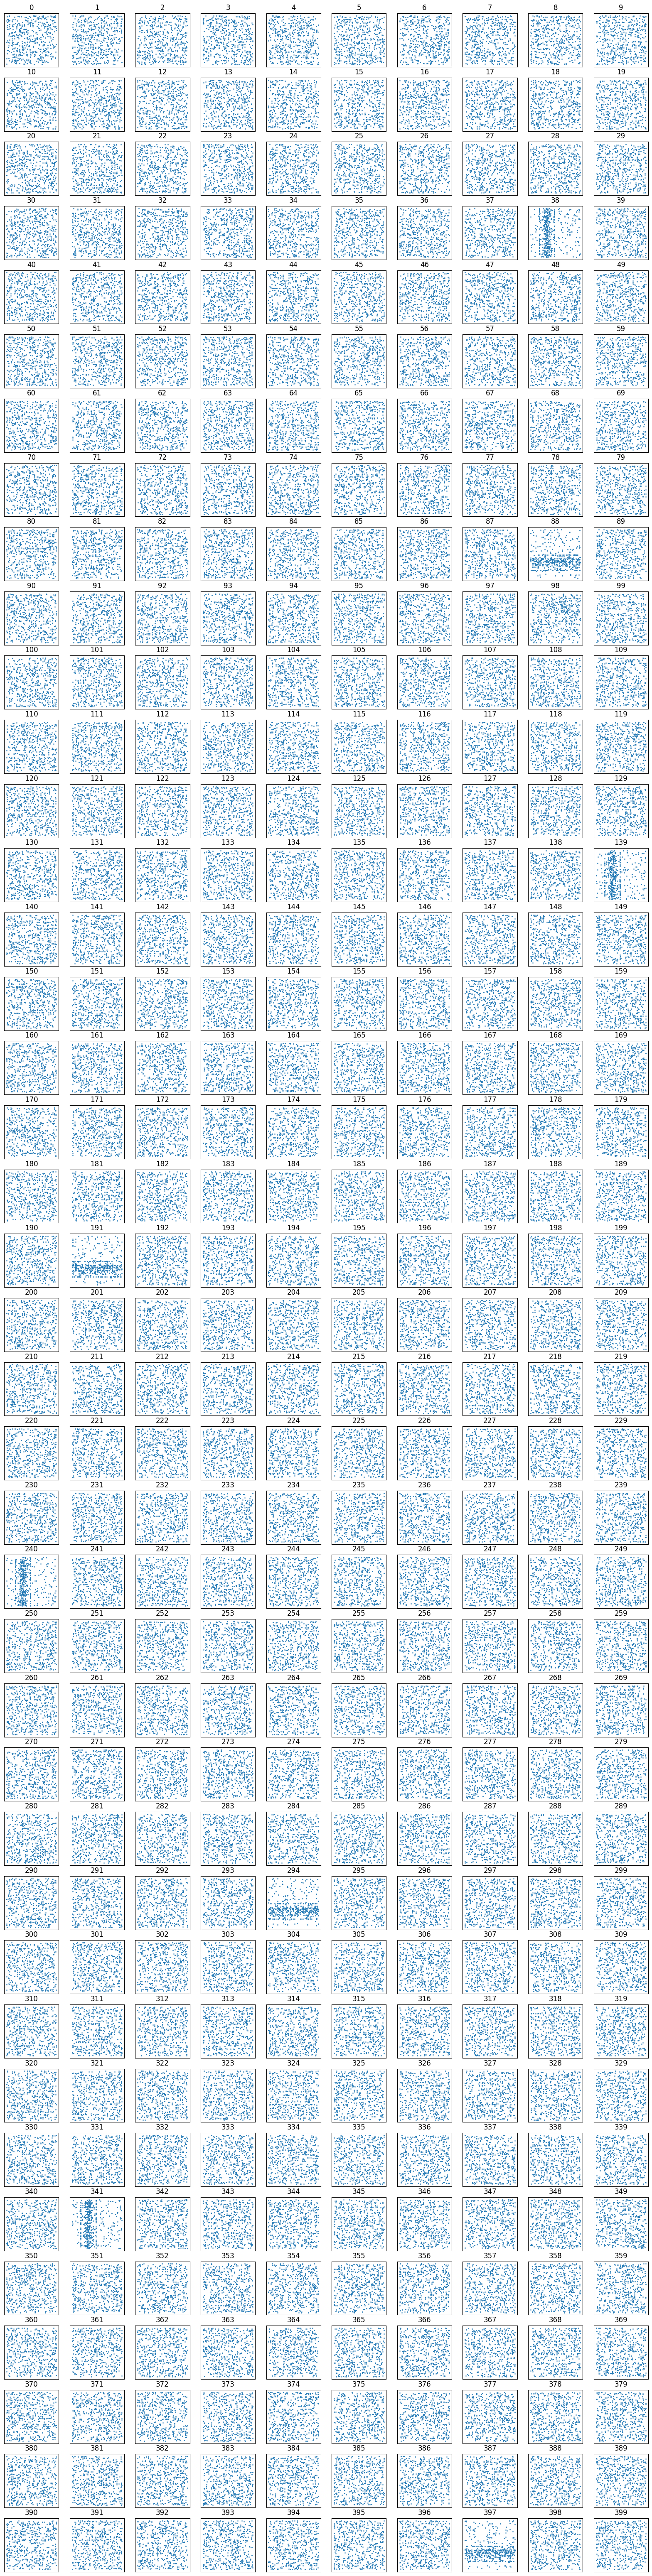

In [7]:
fig, axs = plt.subplots(40, 10, figsize = (20,80))
axs = axs.ravel()
# plot the 400 examples from above loop
for s in range(0, 400):
    axs[s].scatter(df[f'x_{s}'], df[f'y_{s}'],s=1)
    axs[s].set_title(s)
    axs[s].set_xticks([])
    axs[s].set_yticks([])

In [8]:
# notice the 
# vertical patterns on s = 38 + 101*k
# horizont patterns on s = 88 + 103*k

In [9]:
# refined work for part 2
pattern = r'-?\d+'
width = 101
height = 103
df = pd.DataFrame({})
# go out decently far to see images
for k in range(201):
    for secs in [38+101*k, 88+103*k]:
        xs = []
        ys = []
        for line in lines:
            px, py = calculate_location(line, secs, width, height)
            xs.append(px)
            ys.append(py)
        # store all robot locations in a dataframe
        df[f'x_{secs}'] = xs
        df[f'y_{secs}'] = ys

In [10]:
df.head()

x_38  y_38  x_88  y_88  x_139  y_139  x_191  y_191  x_240  y_240  ...  \
0    19    36    25    40     19      7      1     40     19     81  ...   
1    37    23    13    41     37     47      8     41     37     71  ...   
2    94    13    31     9     94     42     81      9     94     71  ...   
3    89    76    47    48     89     73     13     48     89     70  ...   
4    28    67    80    34     28     23     74     34     28     82  ...   

   x_20482  y_20482  x_20137  y_20137  x_20585  y_20585  x_20238  y_20238  \
0       20       40       19       33       97       40       19        4   
1       33       41       37       61       28       41       37       85   
2       33        9       94       16       83        9       94       45   
3       82       48       89       97       48       48       89       94   
4        3       34       28       66       98       34       28       22   

   x_20688  y_20688  
0       73       40  
1       23       41  
2       32        9  
3       14       48  
4       92       34  

[5 rows x 800 columns]

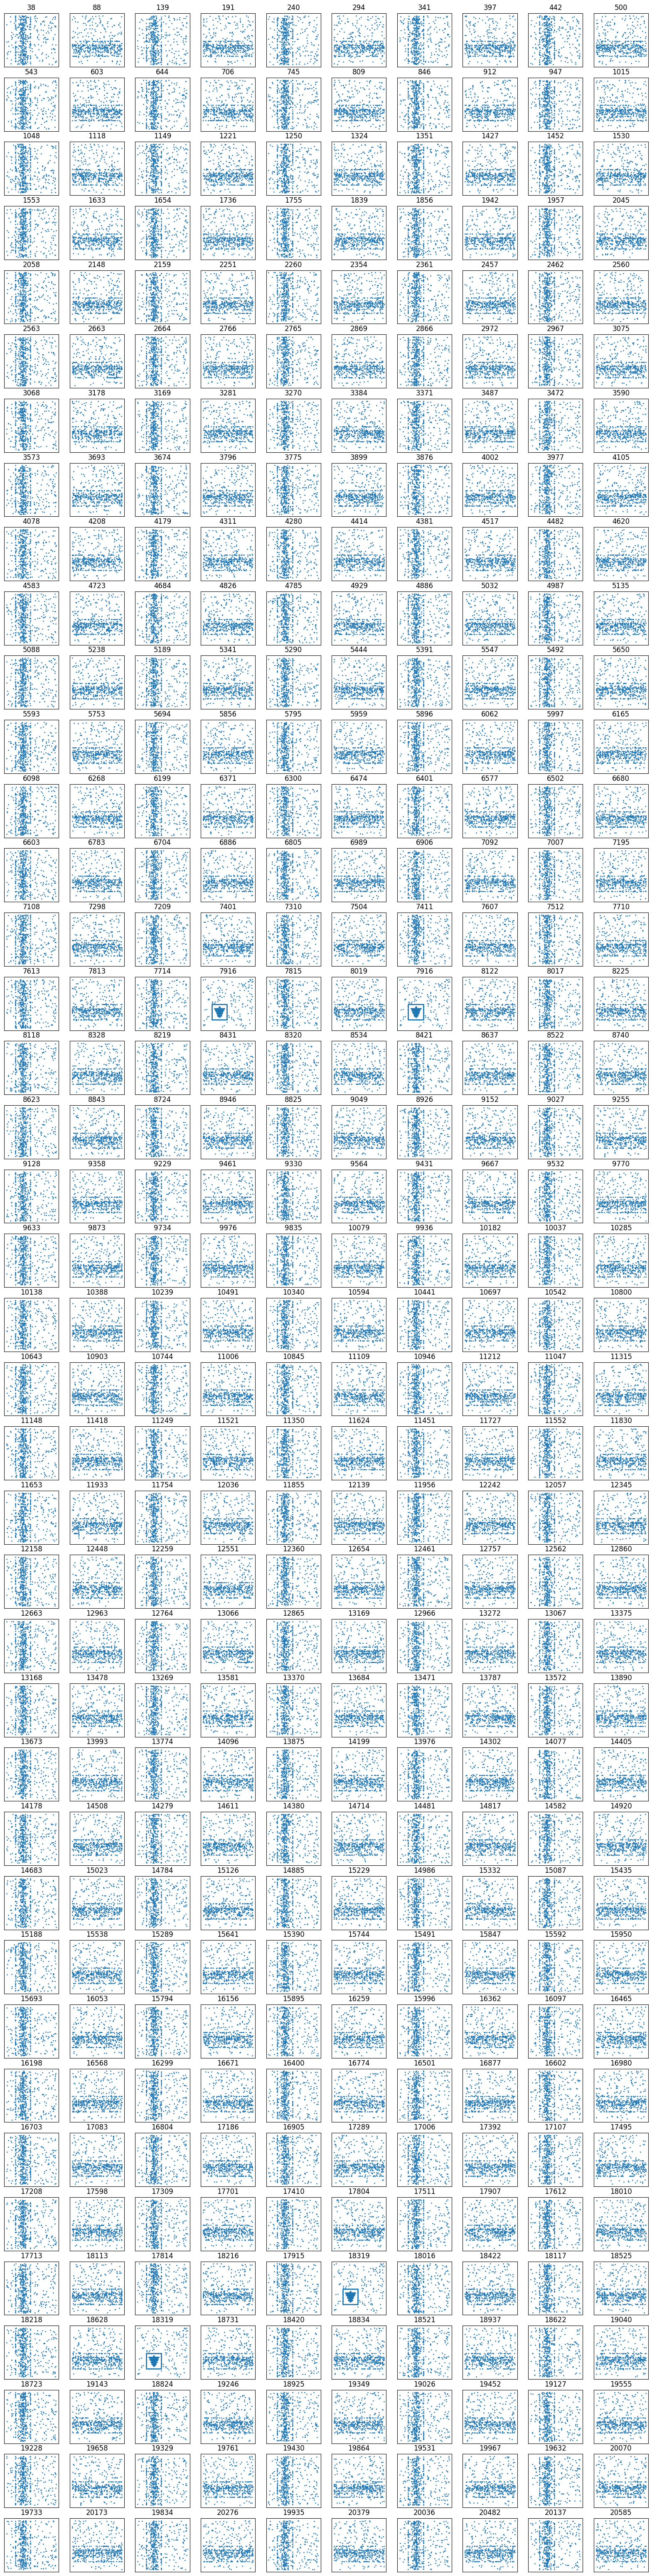

In [11]:
# note that these are not ordered, but since I have to manually use
# my eyes regardless, I don't worry about the ordering
fig, axs = plt.subplots(40, 10, figsize = (20,80))
axs = axs.ravel()
# plot the 400 examples from above loop
for k in range(200):
    for i,secs in enumerate([38+101*k, 88+103*k]):
        axs[2*k+i].scatter(df[f'x_{secs}'], df[f'y_{secs}'],s=1)
        axs[2*k+i].set_title(secs)
        axs[2*k+i].set_xticks([])
        axs[2*k+i].set_yticks([])

In [12]:
# set ans2 from the work above
ans2 = 7916
print(f'Answer 1:\n{ans1}\n')
print(f'Answer 2:\n{ans2}')

Answer 1:
221142636

Answer 2:
7916
